General review:

https://genomebiology.biomedcentral.com/articles/10.1186/gb-2003-4-4-210

(doi:10.1186/gb-2003-4-4-210)

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats as stats
from random import randint
import random as rand
from matplotlib import pylab
from statsmodels.sandbox.stats.multicomp import multipletests
import statsmodels.api as sm

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Subtask 0: Download the gene expression data


http://science.sciencemag.org/highwire/filestream/680254/field_highwire_adjunct_files/5/aad0189_DataFileS5.xlsx

## Task 1: Data wrangling

For some more information on and examples of the plot types we will use here, see:<br>
http://www.arrayanalysis.org/main.html

### Subtask 1.1: Read in aad0189_DataFileS5.xlsx with pandas
Open the spreadsheet in Excel beforehand. Notice that the headers are in the first row, so use the `header` keyword to specify the header line for `read_excel()`.

In [27]:
data = pd.read_excel("DAy2_Files\\aad0189_DataFileS5.xlsx", header = 2)

In [28]:
data.head()

,Original_Order,MATCH_ORDER,Gene,Probeset,Gene.1,Protein,Unnamed: 6,Range CD,Range HFD,Range_All,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
0,12643,NaN,Igh,10403036,Igh,0,NaN,1.495886,1.720705,1.720705,...,4.959,5.483,5.347,5.087,5.125,5.160,5.020,5.170,4.775,4.982
1,12646,NaN,Igh,10403043,Igh,0,NaN,2.938337,1.988940,3.595021,...,7.415,7.252,7.547,7.358,7.424,7.447,7.567,7.732,7.365,7.369
2,12653,NaN,Igh,10403063,Igh,0,NaN,3.719220,1.859610,4.260433,...,6.665,6.948,6.999,6.974,6.886,6.876,7.027,7.093,6.748,6.771
3,8759,1458.0,Hcfc2,10365242,Hcfc2,A0AUN4,NaN,1.479388,1.465101,1.536875,...,9.177,9.021,8.803,8.928,8.914,8.838,9.056,8.924,8.945,8.865
4,18740,8191.0,Ccdc112,10458794,Ccdc112,A0AUP1,NaN,1.834008,1.943962,1.997229,...,6.623,6.371,6.187,6.310,6.448,6.531,6.167,6.401,6.470,6.565


### Subtask 1.2: Extract gene-wise average expression values

The expression of most genes were measured by multiple probes. We would like to reduce the complexity of the data, and have only one, averaged expression row per gene. You can use the `groupby` function to achieve this, but make sure to use the `Gene.1` column instead of `Gene`. They are identical for the majority of rows, but `Gene.1` will be better for us later.

The expression values are stored in the columns that contain the string `Liver`, so slice your DataFrame afterwards to keep only those columns.

In [29]:
data_gen = data.groupby('Gene.1').mean()
data_gen.head()

,Original_Order,MATCH_ORDER,Probeset,Unnamed: 6,Range CD,Range HFD,Range_All,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,14422.333333,NaN,10417445.0,NaN,1.495780,1.366581,1.517264,6.1830,6.353333,6.262333,...,6.364333,6.339333,6.397667,6.3280,6.280333,6.385333,6.460667,6.331667,6.216667,6.278333
100043387,22067.000000,NaN,10490273.0,NaN,2.145033,2.118437,2.388326,10.3840,9.848000,10.108000,...,10.088000,10.553000,9.556000,10.6320,10.427000,10.217000,10.140000,10.639000,10.223000,9.956000
0610007C21Rik,25381.000000,12730.0,10520638.0,NaN,1.368884,1.404445,1.427015,12.3890,12.559000,12.647000,...,12.608000,12.593000,12.792000,12.5730,12.690000,12.700000,12.628000,12.550000,12.660000,12.696000
0610007L01Rik,26309.500000,13092.0,10530142.5,NaN,1.391366,1.395395,1.444313,10.2875,10.390000,10.411000,...,10.280000,10.309000,10.466500,10.1370,10.122000,10.179500,10.370000,10.275000,10.048000,10.154500
0610007P08Rik,12983.500000,4414.0,10405794.5,NaN,1.890313,1.797371,1.918039,8.1160,8.422000,8.235000,...,8.265500,8.275500,7.796000,8.2495,8.297000,8.058000,7.978000,8.148500,8.191000,8.272000


In [30]:
def substring(str_list, substr):
    #finds substring in list of strings returns position list
    out_list = []
    for i, en in enumerate(str_list):
        if substr in en:
            out_list.append(en)
    return out_list

liver_cols = substring(data_gen.columns.tolist(), 'Liver')
#liver_cols = data_gen.columns.tolist[arg_liver]
data_gen_liv = data_gen[liver_cols]

In [31]:
dat = data_gen_liv
dat.head()

,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,BXD44_Liver_CD,BXD45_Liver_CD,BXD48_Liver_CD,BXD49_Liver_CD,BXD51_Liver_CD,BXD55_Liver_CD,BXD56_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,6.1830,6.353333,6.262333,6.263667,6.270,6.201333,6.2370,6.274667,6.319,6.2710,...,6.364333,6.339333,6.397667,6.3280,6.280333,6.385333,6.460667,6.331667,6.216667,6.278333
100043387,10.3840,9.848000,10.108000,9.860000,9.392,9.926000,10.1050,10.040000,10.128,9.4100,...,10.088000,10.553000,9.556000,10.6320,10.427000,10.217000,10.140000,10.639000,10.223000,9.956000
0610007C21Rik,12.3890,12.559000,12.647000,12.639000,12.515,12.659000,12.5710,12.512000,12.651,12.5290,...,12.608000,12.593000,12.792000,12.5730,12.690000,12.700000,12.628000,12.550000,12.660000,12.696000
0610007L01Rik,10.2875,10.390000,10.411000,10.419500,10.306,10.432000,10.2005,10.432000,10.320,10.2945,...,10.280000,10.309000,10.466500,10.1370,10.122000,10.179500,10.370000,10.275000,10.048000,10.154500
0610007P08Rik,8.1160,8.422000,8.235000,8.135000,8.198,8.092500,8.1460,7.876500,8.400,8.0930,...,8.265500,8.275500,7.796000,8.2495,8.297000,8.058000,7.978000,8.148500,8.191000,8.272000


### Subtask 1.3: Quantile normalization: carry out a quantile normalization of the data (or not)

#### 1.3.1: Implement a ratio intensity plot a.k.a. MA plot using matplotlib
The ratio intensity plot compares two microarrays with each other to detect systematic calibration differences between them, and therefore it's an important tool for microarray normalization. When we have so many microarrays (80+ in this case) it is practical to take one as the reference, and compare + normalize the rest against it. For simplicity, we will just compare a single pair now -- the rest would be the same.

Pick any two microarray measurements (columns) of the expression DataFrame.

The ratio intensity plot shows the log2 expression ratio of each pair of corresponding probes as a function of their expression (light intensity) on a scatter plot. Since the data you're working with has been log2-transformed (common practice in microarray experiments) the "ratio" is simply the difference of the values, since log(x1/x2) = log(x1)-log(x2).

Depending on your computer, the scatter plot may take a while to draw, so you can cheat a bit and plot only every 10th data point. You can use `.iloc[::10]` to achieve this.

You can also try adding a reference line at zero, and a rolling average of the points using `statsmodels.api.lowess`.

In [32]:
gen1 = dat.iloc[:,0]#.iloc[::10]
gen2 = dat.iloc[:,1]#.iloc[::10]
Y = np.subtract(gen1, gen2)
X = np.divide(np.add(gen1, gen2),2)


Text(0.5,0,'Intensity')

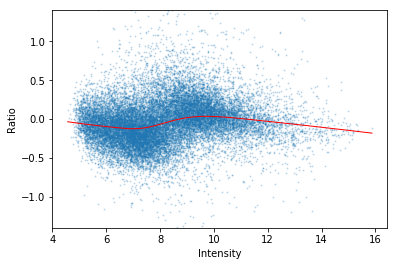

In [33]:
plt.scatter(X,Y, s = 1, alpha = 0.2)
#plt.yscale('log')
plt.ylim([-1.4, 1.4])
low = sm.nonparametric.lowess(Y, X )#return_sorted = False

#plt.plot( X, low, linewidth = 1)
plt.plot(low[:,0], low[:,1], 'r', linewidth = 1)
plt.ylabel('Ratio')
plt.xlabel('Intensity')

The line never deviates significantly from 0. That is probably because the data has been normalized.

In [34]:
low

array([[ 4.572     , -0.0344765 ],
       [ 4.633     , -0.03746205],
       [ 4.658     , -0.0386788 ],
       ...,
       [15.3335    , -0.15892529],
       [15.357     , -0.15987872],
       [15.8725    , -0.18081722]])

#### 1.3.2: Implement a Relative Log Expression (RLE) box plot
The Relative Log Expression (RLE) values are the log2-ratios of gene expression values and the median expression of this gene across all arrays of the experiment. (We are still using log-transformed values, so ratio means difference in practice).

It is assumed that most genes are not systematically over- or underexpressed across the arrays, so it is expected that these log2-ratios are centered around 0 for every array, with a similar standard deviations.

By creating a box-plot out of the RLE values for every array, we can spot arrays that were not normalized correctly.

In [35]:
median = dat.median(axis = 1)
dat_medsub = dat.sub(median, axis = 0)

In [36]:
dat_medsub.head()

,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,BXD44_Liver_CD,BXD45_Liver_CD,BXD48_Liver_CD,BXD49_Liver_CD,BXD51_Liver_CD,BXD55_Liver_CD,BXD56_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,-0.1320,0.038333,-0.052667,-0.051333,-0.045,-0.113667,-0.0780,-0.040333,0.004,-0.0440,...,0.049333,0.024333,0.082667,0.0130,-0.034667,0.070333,0.145667,0.016667,-0.098333,-0.036667
100043387,0.2560,-0.280000,-0.020000,-0.268000,-0.736,-0.202000,-0.0230,-0.088000,0.000,-0.7180,...,-0.040000,0.425000,-0.572000,0.5040,0.299000,0.089000,0.012000,0.511000,0.095000,-0.172000
0610007C21Rik,-0.2280,-0.058000,0.030000,0.022000,-0.102,0.042000,-0.0460,-0.105000,0.034,-0.0880,...,-0.009000,-0.024000,0.175000,-0.0440,0.073000,0.083000,0.011000,-0.067000,0.043000,0.079000
0610007L01Rik,0.0045,0.107000,0.128000,0.136500,0.023,0.149000,-0.0825,0.149000,0.037,0.0115,...,-0.003000,0.026000,0.183500,-0.1460,-0.161000,-0.103500,0.087000,-0.008000,-0.235000,-0.128500
0610007P08Rik,-0.1190,0.187000,0.000000,-0.100000,-0.037,-0.142500,-0.0890,-0.358500,0.165,-0.1420,...,0.030500,0.040500,-0.439000,0.0145,0.062000,-0.177000,-0.257000,-0.086500,-0.044000,0.037000


(-0.75, 0.75)

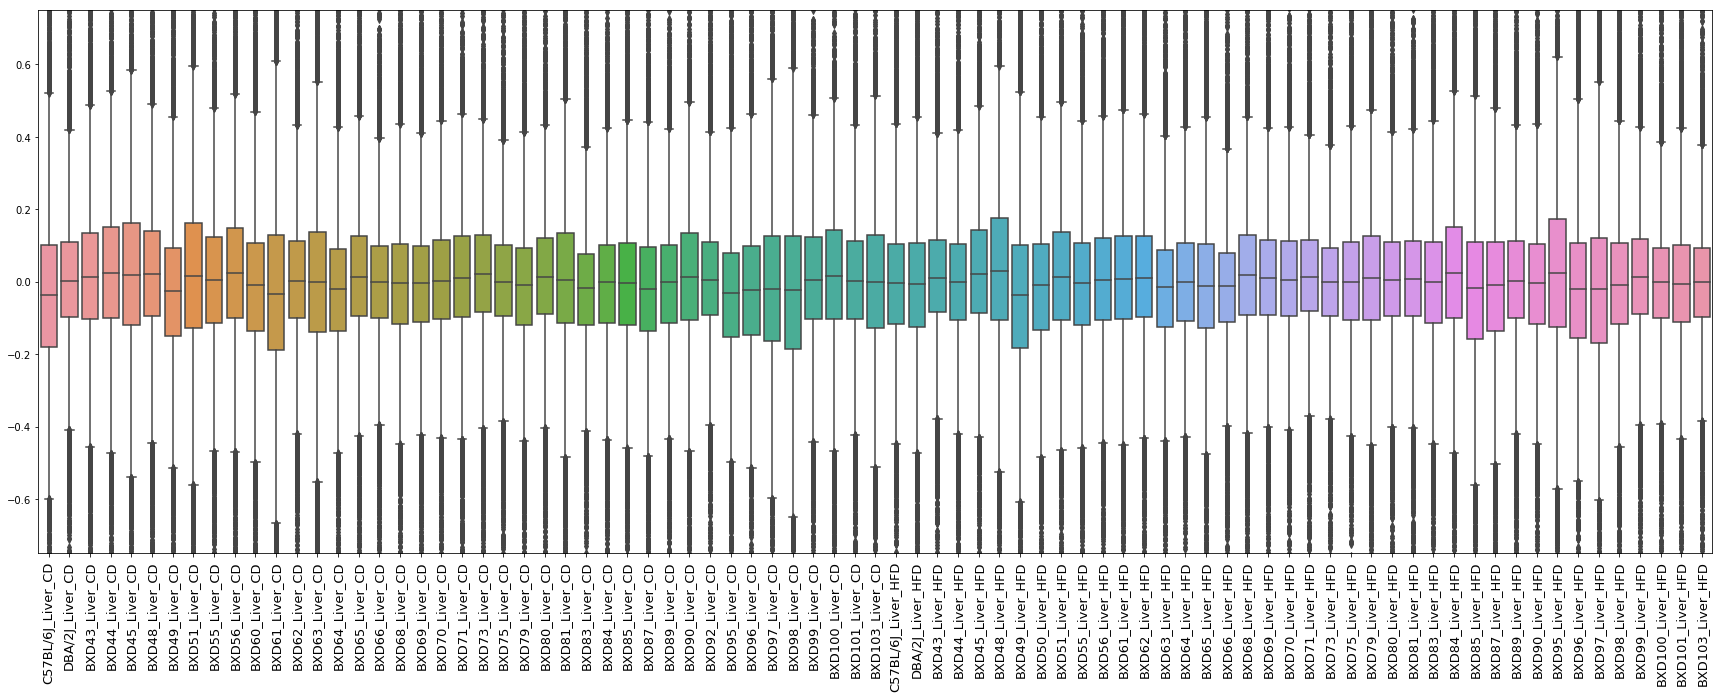

In [37]:
plt.figure(figsize =[30,10])
sns.boxplot(data = dat_medsub)
plt.xticks( size = 13 , rotation=90)
plt.ylim([-0.75,0.75])

#### Subsubtask 1.3.3: If you consider it necessary, perform a quantile normalization for the microarrays

All values are around 0, again confirming the previous normalization of te data. Therefore we do not have to perform a normalization.

## Task 2: Which statistical test to choose?

We want to infer differentially expressed genes between the CD and the HFD condition. Therefore we treat the expression values of all the strains for a given gene under one diet as independent observations of the same random variable. We then compare these distributions between the two diets with a statistical test to see whether their means differ significantly or not.

Since most statistical tests assume certain properties of the compared distributions, we first have to find out which of these assumptions are true for our data, so we can choose a suitable test for differential expression. We will limit ourselves to the following mean-equality tests:

* Student's t-test (assumes distributions are normally distributed, have equal variance, has highest statistical power)
* Welch's t-test (assumes normal distribution, does not care about variance) 
* Wilcoxon's rank-sum test, a.k.a. Whitney-Mann U-test (no assumptions about the tested distributions, weakest statistical power)

Useful resources:
http://docs.scipy.org/doc/scipy-0.17.1/reference/stats.html 
http://statsmodels.sourceforge.net/stable/graphics.html

### Subtask 2.0: Find a way to separate the CD and HFD samples in the expression DataFrame
Since you will have to compare expression values of CD samples with those from HFD samples, you have to be able to access them separately. There are several ways to do this:
* you can create a binary "slicer" Series for CD and HFD columns (used like `expr_df.loc[... , is_cd]`)
* or create two lists with column names for CD and HFD samples (used like `expr_df.loc[... , cols_cd]`)
* or just create two separate DataFrames for CD and HFD samples

In [38]:
dat_medsub = dat
CD_cols = substring(dat_medsub.columns.tolist(),'_CD')
HFD_cols = substring(dat_medsub.columns.tolist(),'_HFD')
dat_CD = dat_medsub[CD_cols].drop(columns = 'BXD92_Liver_CD')
dat_HFD = dat_medsub[HFD_cols]
display(dat_CD.head())
display(dat_HFD.head())

,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,BXD44_Liver_CD,BXD45_Liver_CD,BXD48_Liver_CD,BXD49_Liver_CD,BXD51_Liver_CD,BXD55_Liver_CD,BXD56_Liver_CD,...,BXD89_Liver_CD,BXD90_Liver_CD,BXD95_Liver_CD,BXD96_Liver_CD,BXD97_Liver_CD,BXD98_Liver_CD,BXD99_Liver_CD,BXD100_Liver_CD,BXD101_Liver_CD,BXD103_Liver_CD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,6.1830,6.353333,6.262333,6.263667,6.270,6.201333,6.2370,6.274667,6.319,6.2710,...,6.300667,6.274667,6.3450,6.283,6.294333,6.268667,6.2190,6.332333,6.432667,6.428333
100043387,10.3840,9.848000,10.108000,9.860000,9.392,9.926000,10.1050,10.040000,10.128,9.4100,...,10.091000,10.015000,10.4840,10.306,10.306000,10.438000,10.0630,10.260000,9.832000,9.898000
0610007C21Rik,12.3890,12.559000,12.647000,12.639000,12.515,12.659000,12.5710,12.512000,12.651,12.5290,...,12.815000,12.761000,12.4730,12.583,12.441000,12.612000,12.5340,12.721000,12.661000,12.583000
0610007L01Rik,10.2875,10.390000,10.411000,10.419500,10.306,10.432000,10.2005,10.432000,10.320,10.2945,...,10.354000,10.320000,10.2595,10.215,10.177500,10.249500,10.3370,10.369500,10.254500,10.216000
0610007P08Rik,8.1160,8.422000,8.235000,8.135000,8.198,8.092500,8.1460,7.876500,8.400,8.0930,...,8.305000,7.949000,8.2520,8.204,8.170000,8.425500,8.1525,8.015500,8.156500,8.110000


,C57BL/6J_Liver_HFD,DBA/2J_Liver_HFD,BXD43_Liver_HFD,BXD44_Liver_HFD,BXD45_Liver_HFD,BXD48_Liver_HFD,BXD49_Liver_HFD,BXD50_Liver_HFD,BXD51_Liver_HFD,BXD55_Liver_HFD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,6.365333,6.348333,6.301333,6.345667,6.350667,6.285667,6.207667,6.310333,6.362667,6.474667,...,6.364333,6.339333,6.397667,6.3280,6.280333,6.385333,6.460667,6.331667,6.216667,6.278333
100043387,10.215000,10.153000,10.361000,10.044000,9.736000,10.108000,10.195000,10.074000,10.155000,9.979000,...,10.088000,10.553000,9.556000,10.6320,10.427000,10.217000,10.140000,10.639000,10.223000,9.956000
0610007C21Rik,12.521000,12.611000,12.626000,12.527000,12.703000,12.671000,12.439000,12.618000,12.656000,12.302000,...,12.608000,12.593000,12.792000,12.5730,12.690000,12.700000,12.628000,12.550000,12.660000,12.696000
0610007L01Rik,10.334500,10.363000,10.401500,10.326000,10.404000,10.231500,10.221500,10.218000,10.357000,10.357000,...,10.280000,10.309000,10.466500,10.1370,10.122000,10.179500,10.370000,10.275000,10.048000,10.154500
0610007P08Rik,8.241500,8.286500,8.154500,8.370500,8.254500,7.966000,8.334000,8.304500,8.402000,8.363500,...,8.265500,8.275500,7.796000,8.2495,8.297000,8.058000,7.978000,8.148500,8.191000,8.272000


In [39]:
#display(dat_CD.columns.tolist())
#display(dat_HFD.columns.tolist())

### Subtask 2.1: Do the CD and HFD samples have equal variance?

#### 2.1.1: Choose a random gene
It's a good idea to store the gene name (or the numeric index of the row) you used, so we can reproduce it later.

In [40]:
chosen_gene = '0610007L01Rik'
dat_CD_cop = dat_CD.copy()
dat_HFD_cop = dat_HFD.copy()


In [41]:
dat_CD.loc['0610007P08Rik']

C57BL/6J_Liver_CD    8.1160
DBA/2J_Liver_CD      8.4220
BXD43_Liver_CD       8.2350
BXD44_Liver_CD       8.1350
BXD45_Liver_CD       8.1980
BXD48_Liver_CD       8.0925
BXD49_Liver_CD       8.1460
BXD51_Liver_CD       7.8765
BXD55_Liver_CD       8.4000
BXD56_Liver_CD       8.0930
BXD60_Liver_CD       8.2290
BXD61_Liver_CD       8.1335
BXD62_Liver_CD       8.0140
BXD63_Liver_CD       8.1945
BXD64_Liver_CD       8.1345
BXD65_Liver_CD       7.9355
BXD66_Liver_CD       8.2880
BXD68_Liver_CD       8.3095
BXD69_Liver_CD       8.3245
BXD70_Liver_CD       8.1445
BXD71_Liver_CD       7.9845
BXD73_Liver_CD       8.3095
BXD75_Liver_CD       8.3265
BXD79_Liver_CD       8.2715
BXD80_Liver_CD       8.2740
BXD81_Liver_CD       7.9105
BXD83_Liver_CD       8.1375
BXD84_Liver_CD       8.1260
BXD85_Liver_CD       8.3175
BXD87_Liver_CD       8.3740
BXD89_Liver_CD       8.3050
BXD90_Liver_CD       7.9490
BXD95_Liver_CD       8.2520
BXD96_Liver_CD       8.2040
BXD97_Liver_CD       8.1700
BXD98_Liver_CD      

#### 2.1.2: Make a quantile-quantile (Q-Q) plot comparing the two sample groups for the chosen gene and interpret what you see
Pandas can calculate quantiles for you, or you can use `statsmodels.api.qqplot_2samples`

Text(0,0.5,'HFD')

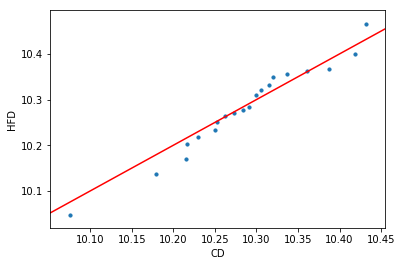

In [42]:
dat_CD = dat_CD_cop.loc['0610007L01Rik']
dat_HFD = dat_HFD_cop.loc['0610007L01Rik']

q_CD = [dat_CD.quantile(x) for x in np.linspace(0,1,20)]
q_HFD = [dat_HFD.quantile(x) for x in np.linspace(0,1,20)]
plt.scatter(q_CD, q_HFD, s = 10, alpha = 1)
xlim, ylim = plt.xlim(), plt.ylim()
plt.plot([0,100],[0,100], color='r')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('CD')
plt.ylabel('HFD')

In case of the testet gene no significant bias in expression can be seen as all values are around the 1 1 line

#### 2.1.3: Apply an appropriate statistical test in order to figure out whether the samples have equal variance
The Levene-test is suitable, and it's implemented in `scipy.stats`. But you're free to use a different one if you like.

In [43]:
stats.levene(dat_CD, dat_HFD)

LeveneResult(statistic=0.7631792975970796, pvalue=0.3850170879579443)

In [44]:
vals = stats.levene(dat_CD, dat_HFD)
#vals[1]

The p-value is not significantly low. Therefore the 0 hypothesis can be accepted and the samples CD and HFD have a similar variance for the chosen gene.

In [45]:
dat_CD_cop.head()

,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,BXD44_Liver_CD,BXD45_Liver_CD,BXD48_Liver_CD,BXD49_Liver_CD,BXD51_Liver_CD,BXD55_Liver_CD,BXD56_Liver_CD,...,BXD89_Liver_CD,BXD90_Liver_CD,BXD95_Liver_CD,BXD96_Liver_CD,BXD97_Liver_CD,BXD98_Liver_CD,BXD99_Liver_CD,BXD100_Liver_CD,BXD101_Liver_CD,BXD103_Liver_CD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,6.1830,6.353333,6.262333,6.263667,6.270,6.201333,6.2370,6.274667,6.319,6.2710,...,6.300667,6.274667,6.3450,6.283,6.294333,6.268667,6.2190,6.332333,6.432667,6.428333
100043387,10.3840,9.848000,10.108000,9.860000,9.392,9.926000,10.1050,10.040000,10.128,9.4100,...,10.091000,10.015000,10.4840,10.306,10.306000,10.438000,10.0630,10.260000,9.832000,9.898000
0610007C21Rik,12.3890,12.559000,12.647000,12.639000,12.515,12.659000,12.5710,12.512000,12.651,12.5290,...,12.815000,12.761000,12.4730,12.583,12.441000,12.612000,12.5340,12.721000,12.661000,12.583000
0610007L01Rik,10.2875,10.390000,10.411000,10.419500,10.306,10.432000,10.2005,10.432000,10.320,10.2945,...,10.354000,10.320000,10.2595,10.215,10.177500,10.249500,10.3370,10.369500,10.254500,10.216000
0610007P08Rik,8.1160,8.422000,8.235000,8.135000,8.198,8.092500,8.1460,7.876500,8.400,8.0930,...,8.305000,7.949000,8.2520,8.204,8.170000,8.425500,8.1525,8.015500,8.156500,8.110000


#### 2.1.4: To asses the global situation, run the equal variance test for all genes, plot the histogram of the p-values, and draw a conclusion

In [46]:
dat_CD = dat_CD_cop
dat_HFD = dat_HFD_cop
p_list = []
for gene in dat_CD.index:
    #print(gene)
    #gene = gene.replace('_CD', '_HFD')
    p_list.append(stats.levene(dat_CD.loc[gene], dat_HFD.loc[gene])[1])
p_list
    
    

[0.6208271035207571,
 0.3632909430767427,
 0.6571458579815987,
 0.3850170879579443,
 0.7463500509589891,
 0.20231630364372882,
 0.818371088532141,
 0.40610133669762793,
 0.779302259716558,
 0.6890609677063422,
 0.5309034901491382,
 0.32217062320172307,
 0.36661054178536456,
 0.2792557363320341,
 0.5779995989692637,
 0.5962102731045825,
 0.04314816925735071,
 0.024145862346455056,
 0.3597269209806684,
 0.3806015107292977,
 0.4236994516734406,
 0.4309042242472847,
 0.20646888924181492,
 0.43460157799326715,
 0.6460051537028724,
 0.24326047759977779,
 0.29806410219189355,
 0.7464064841366387,
 0.7978084523476823,
 0.3762176870190913,
 0.8568860972622687,
 0.19537956086479036,
 0.49268340274687217,
 0.5805181479871779,
 0.4229990738310332,
 0.28404514820824234,
 0.9770608162038869,
 0.7080198780167577,
 0.9786217099460667,
 0.5427183188322147,
 0.8778182813031287,
 0.5422740785442894,
 0.8248755380014762,
 0.5926183830233704,
 0.19852588952791547,
 0.11460069882682522,
 0.3031397559993384,

In [47]:
p_vals = pd.DataFrame(p_list, index = dat_CD.index)
display(p_vals.head())

,0
Gene.1,
544988,0.620827
100043387,0.363291
0610007C21Rik,0.657146
0610007L01Rik,0.385017
0610007P08Rik,0.746350


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216F384B748>]],
      dtype=object)

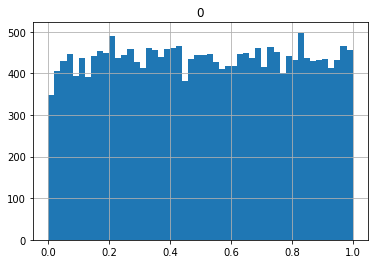

In [48]:
p_vals.hist(bins = 50)

The values are almost uniformly distibuted with even fewer low p values than expected from a uniform distribution.
The 0 hypothesis of the levene test is, that both tested series have the same variance.
Due to the almost uniform of p-values, which would also be expected for alarge set of series that fulfills the 0 Hypthesis, we can assume, that for the set of series that we tested, the 0 hypothesis is true, thus the compared series have the same variance.

In [49]:
p_vals_sorted = p_vals.sort_values(by = 0)


### Subtask 2.2 Are the CD and HFD samples normally distributed?

#### 2.2.1: Using the same gene randomly chosen above, make Box plots for the corresponding CD and HFD samples. Could they come from normal distributions on first glance?

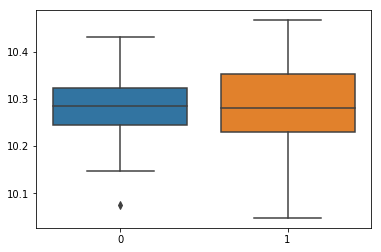

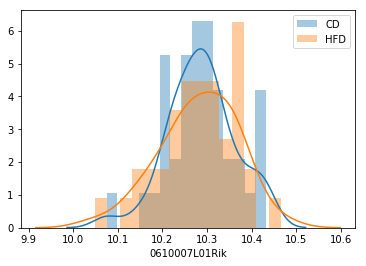

In [50]:
'''
sns.boxplot(dat_CD.loc['0610007L01Rik'])
plt.show()
dat_CD.boxplot()
plt.show()
'''
#dat_CD.loc['0610007L01Rik'].hist(bins = 15, alpha = 0.5, label = 'CD')

#dat_HFD.loc['0610007L01Rik'].hist(bins = 15, alpha = 0.5, label = 'HFD')
#plt.legend()
#plt.show()
sns.boxplot(data = [dat_CD.loc['0610007L01Rik'],dat_HFD.loc['0610007L01Rik']])
plt.show()

sns.distplot(dat_CD.loc['0610007L01Rik'],bins = 15,  label = 'CD')
sns.distplot(dat_HFD.loc['0610007L01Rik'],bins = 15,  label = 'HFD')
plt.legend()


I chose to plot histograms instead of boxplots.
As you can see it has a tendency towards a normal distribution. 
However for a single gene, the sample size is not big enough to draw a final conclusion.

####  2.2.2: Create a Q-Q plot for each sample, but this time instead of comparing them with each other, compare both with a theoretical normal distribution.
###### Can be skipped!

In [52]:
def calc_norm_param(series):
    mean = np.mean(series)
    var = np.var(series)
    return mean, var
#q_CD = q_CD.values()

CD_mean, CD_var = calc_norm_param(q_CD)
HFD_mean, HFD_var = calc_norm_param(q_HFD)
linspace = np.linspace(q_CD[0],q_CD[-1],num = len(q_CD))
ther_norm_dist = stats.norm.pdf(linspace, CD_mean, HFD_mean, size = len(q_CD))
q_CD = [dat_CD.quantile(x) for x in np.linspace(0,1,20)]
q_HFD = [dat_HFD.quantile(x) for x in np.linspace(0,1,20)]
plt.scatter(q_CD, ther_norm_dist, s = 10, alpha = 1)
xlim, ylim = plt.xlim(), plt.ylim()
plt.plot([0,100],[0,100], color='r')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('CD')
plt.ylabel('ther_norm_dist')

TypeError: _parse_args() got an unexpected keyword argument 'size'

####  2.2.3: Run an appropriate statistical test in order to figure out whether the samples are normally distributed
`scipy.stats` can help you with this one too.

In [53]:
res_list = []
for gene in dat_CD.index.tolist():
    
    res_list.append(stats.shapiro(dat_CD.loc[gene])[1])
res = pd.DataFrame(res_list, index = dat_CD.index)

In [54]:
stats.shapiro(dat_CD.loc['0610007C21Rik'])

(0.9864736199378967, 0.9061822891235352)

In [55]:
res_list2 = []
for gene in dat_HFD.index.tolist():
    
    res_list2.append(stats.shapiro(dat_HFD.loc[gene])[1])
res_HFD = pd.DataFrame(res_list, index = dat_HFD.index)

####  2.2.4: To asses the global situation, plot a histogram of your normality test's p-values for all the genes

Text(0.5,1,'HFD')

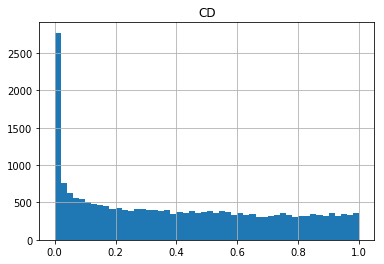

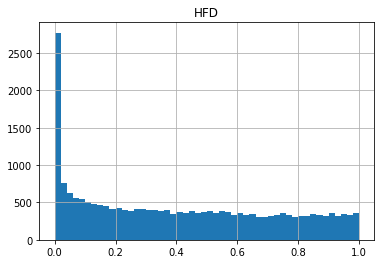

In [56]:

res.hist(bins = 50)
plt.title('CD')

res.hist(bins = 50)
plt.title('HFD')

0 Hypothesis: Normally distributed
High p-value: Normal distribution
low p-value: No normal distribution

Most of the data has a value with a significantly large p-value which is thus normally distributed.
However a small fraction (peak to the very left) has a significantly low p-value and is thus most likely not normally distributed.

## Task 3: Differential expression testing

Having checked the assumptions that our data fulfills, it's time to settle on a suitable statistical test to compare gene expression values between the CD and HFD conditions.

We would like you to end up with a DataFrame, which is indexed by gene identifiers, and has at least three columns:
* log2 fold change between CD and HFD means (reminder: our expression data is already log2 transformed)
* raw p-values of the mean-equality test that you chose
* B-H corrected p-values of the test

If you have enough time, you can add the raw and corrected p-values of other mean-equality tests as well, and even compare them with each other.

You may want to create the above columns as individual `Series` objects, and concatenate them at the end, since initializing a large `DataFrame` in advance and filling it cell by cell is very inefficient.

In [57]:
#log2fc = dat[dat_CD.columns].mean(axis = 1) - dat_HFD.mean(axis = 1)
log2fc = dat_CD.mean(axis = 1) - dat_HFD.mean(axis = 1)
pvals = dat.apply(lambda x : stats.ttest_ind(x.loc[dat_CD.columns],x.loc[dat_HFD.columns])[1], axis = 1)


In [58]:
res_df = pd.DataFrame({'p_val': pvals, 'log2fc' : log2fc})

In [59]:
def benj_test(p_val_chr_df):
    p_val_chr_df['p_corr'] = multipletests(p_val_chr_df['p_val'], method ='fdr_bh', alpha = 0.05)[1]
benj_test(res_df)
res_df.head()

,log2fc,p_val,p_corr
Gene.1,,,
544988,-0.040208,0.026537,0.054807
100043387,-0.090000,0.118846,0.190697
0610007C21Rik,-0.014575,0.510414,0.610010
0610007L01Rik,0.005400,0.769022,0.830732
0610007P08Rik,-0.062063,0.059674,0.107970


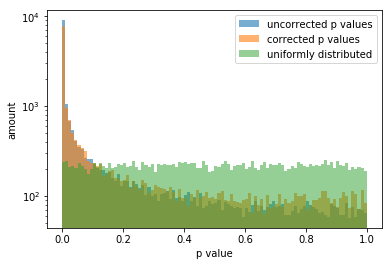

In [60]:
def hist_plot(p_val_chr_df):
    uni_arr = np.random.uniform(size = len(p_val_chr_df['p_val']))
    plt.hist(p_val_chr_df['p_val'], alpha = 0.6, bins = 100, label = 'uncorrected p values')
    plt.hist(p_val_chr_df['p_corr'], alpha = 0.6, bins = 100, label = 'corrected p values')
    plt.hist(uni_arr, alpha = 0.5, bins = 100, label = 'uniformly distributed')
    plt.xlabel('p value')
    plt.ylabel('amount')
    plt.yscale('log')
    plt.legend()
hist_plot(res_df)

Whatch out the y axis is logscale!

As we can see there is a very large amount of genes that have a low p-value.
Our 0 hypothesis was that the expression is independent of the diet.
This hypothesis is rejected for the large majority of genes.
Thus the gene expression of most genes depend significantly on the diet.

## Task 4: Volcano plots

Volcano plots visualize two key aspects of a differential expression experiment at once on a single scatter plot: the significance of differential expression as a function of the log2 fold change between the two conditions.
For a more detailed description:

* arXiv:1103.3434 (https://arxiv.org/abs/1103.3434)
* http://www.ncbi.nlm.nih.gov/pubmed/23602812 (doi:10.1016/j.compbiolchem.2013.02.003)

### Subtask 4.1:  Implement a Volcano plot
Do it from scratch using matplotlib. Try to include cut-off lines and highlight significant genes with a different color.

In [61]:
res_df.head()

,log2fc,p_val,p_corr
Gene.1,,,
544988,-0.040208,0.026537,0.054807
100043387,-0.090000,0.118846,0.190697
0610007C21Rik,-0.014575,0.510414,0.610010
0610007L01Rik,0.005400,0.769022,0.830732
0610007P08Rik,-0.062063,0.059674,0.107970


In [64]:
res_df['p_val_log'] = np.log10(res_df['p_val'])*-1
res_df.head()

,log2fc,p_val,p_corr,p_val_log
Gene.1,,,,
544988,-0.040208,0.026537,0.054807,1.576142
100043387,-0.090000,0.118846,0.190697,0.925016
0610007C21Rik,-0.014575,0.510414,0.610010,0.292078
0610007L01Rik,0.005400,0.769022,0.830732,0.114061
0610007P08Rik,-0.062063,0.059674,0.107970,1.224216


Text(0,0.5,'-log10 p')

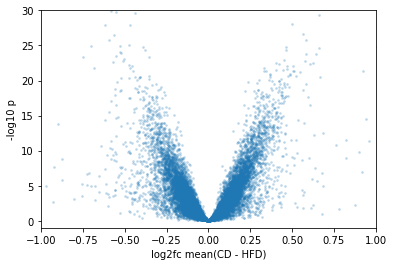

In [72]:
plt.scatter(res_df['log2fc'], res_df['p_val_log'], s = 3, alpha = 0.2)
plt.xlim([-1,1])
plt.ylim([-1,30])
plt.xlabel('log2fc mean(CD - HFD)')
plt.ylabel('-log10 p')

In [81]:
res_df_keep = res_df[(np.abs(res_df['log2fc']) > 0.5) & (res_df['p_val_log'] > 5)]
#res_df_keep = res_df[ (res_df['p_val_log'] > 0.5)]
display(res_df_keep.head())
np.shape(res_df_keep)

,log2fc,p_val,p_corr,p_val_log
Gene.1,,,,
5330416C01Rik,0.540275,2.104001e-38,4.594086e-34,37.676954
5430435G22Rik,0.581875,2.787908e-20,6.689448e-18,19.554722
6330409D20Rik,0.663750,4.200036e-30,6.550556e-27,29.376747
9030619P08Rik,-1.283550,4.013907e-14,2.116418e-12,13.396433
A930018P22Rik,0.504375,9.229469e-23,4.030509e-20,22.034823


(120, 4)

We are interested in those genes, that have a high log2fc, meaning that for this genes, there is a high phenotypic difference between the diets for the same phenotype.
And a low p-value (high -log p value)
We got 120 genes for which -log10 p > 5 and |log2fc| > 0.5

Text(0,0.5,'-log10 p')

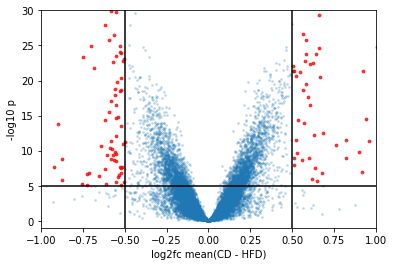

In [93]:
plt.scatter(res_df['log2fc'], res_df['p_val_log'], s = 3, alpha = 0.2)
plt.scatter(res_df_keep['log2fc'], res_df_keep['p_val_log'], s = 8, alpha = 0.7, color = 'red')
#Lines
x1 = np.array([-5, 40])
x2a = np.array([-0.5, -0.5])
x2b = np.array([0.5, 0.5])
plt.plot(x2a, x1, color = 'black')
plt.plot(x2b, x1, color = 'black')
y1 = np.array([-2, 2])
y2 = np.array([5, 5])
plt.plot(y1, y2, color = 'black')
plt.xlim([-1,1])
plt.ylim([-1,30])
plt.xlabel('log2fc mean(CD - HFD)')
plt.ylabel('-log10 p')

### Subtask 4.2: Interpret the Volcano plot
Why doesn't fold change and significance correlate more directly? Can you explain the outliers?

We calculated the p-value using the student t test. Its 0 hypothesis is , that the compared distributions have a similar mean. That is why when comparing both, we would expect 

### Subtask 4.3: Create a Volcano plot with the corrected p-values from Task 3

,log2fc,p_val,p_corr,p_val_log
Gene.1,,,,
5330416C01Rik,0.540275,2.104001e-38,4.594086e-34,37.676954
5430435G22Rik,0.581875,2.787908e-20,6.689448e-18,19.554722
6330409D20Rik,0.663750,4.200036e-30,6.550556e-27,29.376747
9030619P08Rik,-1.283550,4.013907e-14,2.116418e-12,13.396433
A930018P22Rik,0.504375,9.229469e-23,4.030509e-20,22.034823


Text(0.5,1,'Corrected p_value')

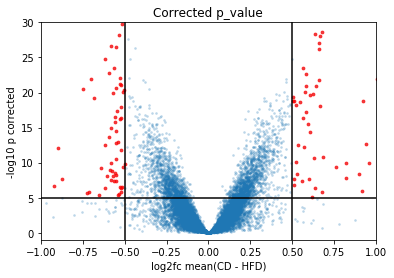

In [103]:
res_df['p_val_corr_log'] = np.log10(res_df['p_corr'])*-1

res_df_keep_corr = res_df[(np.abs(res_df['log2fc']) > 0.5) & (res_df['p_val_corr_log'] > 5)]
#res_df_keep = res_df[ (res_df['p_val_log'] > 0.5)]
display(res_df_keep.head())
np.shape(res_df_keep)

plt.scatter(res_df['log2fc'], res_df['p_val_corr_log'], s = 3, alpha = 0.2)
plt.scatter(res_df_keep_corr['log2fc'], res_df_keep_corr['p_val_corr_log'], s = 8, alpha = 0.7, color = 'red')
#Lines
x1 = np.array([-5, 40])
x2a = np.array([-0.5, -0.5])
x2b = np.array([0.5, 0.5])
plt.plot(x2a, x1, color = 'black')
plt.plot(x2b, x1, color = 'black')
y1 = np.array([-2, 2])
y2 = np.array([5, 5])
plt.plot(y1, y2, color = 'black')
plt.xlim([-1,1])
plt.ylim([-1,30])
plt.xlabel('log2fc mean(CD - HFD)')
plt.ylabel('-log10 p corrected')
plt.title('Corrected p_value')

#np.shape([res_df_keep_corr])

## Finally, save your fold change / p-value DataFrame as CSV for later use.

*Manually copy the below tasks at the end of your Day56_DE_Analysis notebook. Continue working with whatever DataFrames you loaded and created there. This isn't a separate notebook, it's a continuation of the one we started on Friday.*

## Task 5: Expression heatmaps
    
Heatmaps are a standard way of visualizing the expression of multiple genes across a set of samples, especially so if one is interested in the expression signatures associated with different conditions. Heatmap visualization is often combined with clustering in order to group genes and/or samples with similar expression profiles together, therefore we will use seaborn's `clustermap` to do the job.

Since the number of measured genes is very high (20,000+) in our experiment, it isn't practical to place them all on a heat map. For a start, limit yourself to every 100th gene and create a clustered heatmap out of their expression values.

Does this visualization seem useful to you? Why not?

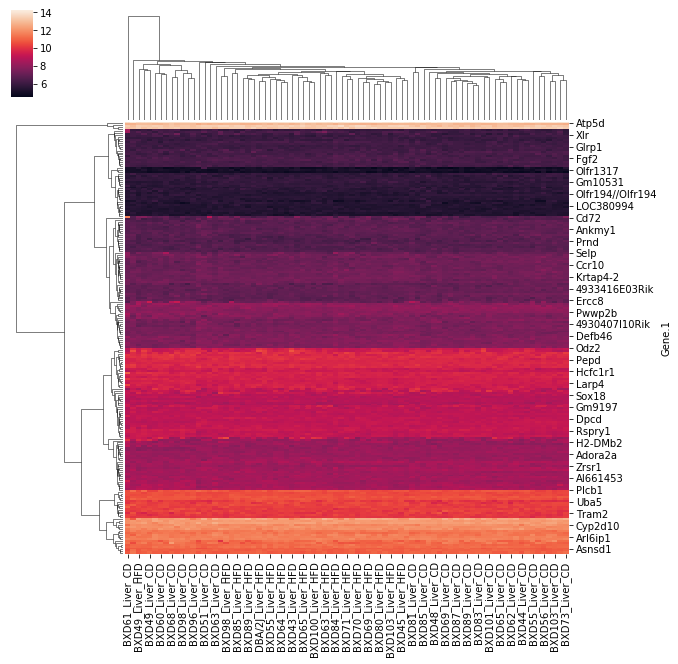

In [118]:
dat_plot = dat[::100]
sns.clustermap(dat_plot)

Not much clustering on y axis, most clustering on x axis:
Because on x axis those genes are clustered according to their general expression level, as the expression values are absolute. This does not tell us much about the expression difference caused by the diets. That's why we need to normalize them

In [119]:
dat.head()

,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,BXD44_Liver_CD,BXD45_Liver_CD,BXD48_Liver_CD,BXD49_Liver_CD,BXD51_Liver_CD,BXD55_Liver_CD,BXD56_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,6.1830,6.353333,6.262333,6.263667,6.270,6.201333,6.2370,6.274667,6.319,6.2710,...,6.364333,6.339333,6.397667,6.3280,6.280333,6.385333,6.460667,6.331667,6.216667,6.278333
100043387,10.3840,9.848000,10.108000,9.860000,9.392,9.926000,10.1050,10.040000,10.128,9.4100,...,10.088000,10.553000,9.556000,10.6320,10.427000,10.217000,10.140000,10.639000,10.223000,9.956000
0610007C21Rik,12.3890,12.559000,12.647000,12.639000,12.515,12.659000,12.5710,12.512000,12.651,12.5290,...,12.608000,12.593000,12.792000,12.5730,12.690000,12.700000,12.628000,12.550000,12.660000,12.696000
0610007L01Rik,10.2875,10.390000,10.411000,10.419500,10.306,10.432000,10.2005,10.432000,10.320,10.2945,...,10.280000,10.309000,10.466500,10.1370,10.122000,10.179500,10.370000,10.275000,10.048000,10.154500
0610007P08Rik,8.1160,8.422000,8.235000,8.135000,8.198,8.092500,8.1460,7.876500,8.400,8.0930,...,8.265500,8.275500,7.796000,8.2495,8.297000,8.058000,7.978000,8.148500,8.191000,8.272000


### Subtask 5.1

As the variance of expression values for individual genes is much lower than the variance of expression levels across the entire transcriptome, it is natural to normalize expression values and display differences from each gene's average expression, instead of just plotting the raw expression values. You already know how to do this normalization for an entire DataFrame with a single expression. Does the heatmap look more appealing to you now?

In [128]:
#Normalize by median and standart deviation.
#subtract median because of log scale (values are log color values)
dat_norm = dat.subtract(dat.median(axis = 1), axis = 0).divide(dat.std(axis = 1), axis = 0)
#dat_medsub = dat.sub(median, axis = 0)

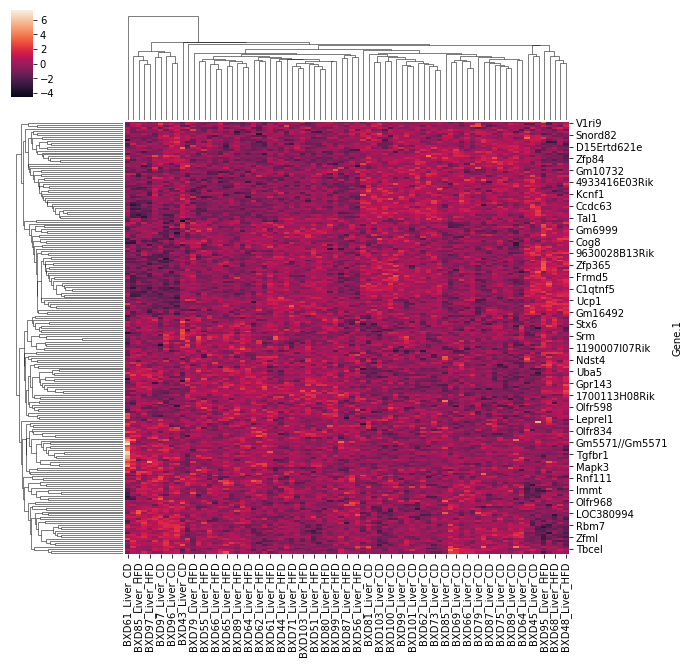

In [127]:
sns.clustermap(dat_norm[::100])

### Subtask 5.2
Use a diverging colormap, and center it at zero, so that the neutral midpoint color (black or white) represents the average expression, while the diverging red/blue or red/green colors represent up- and down-regulation.

Scale your heatmap's color bar, so that it doesn't get stretched out too much due to a few outliers.

Try to add color labels to the samples to visually distinguish CD and HFD columns easily. Eventually you should arrive at an informative and visually appealing heatmap. With the color labels now displayed, are you happy with the clustering?

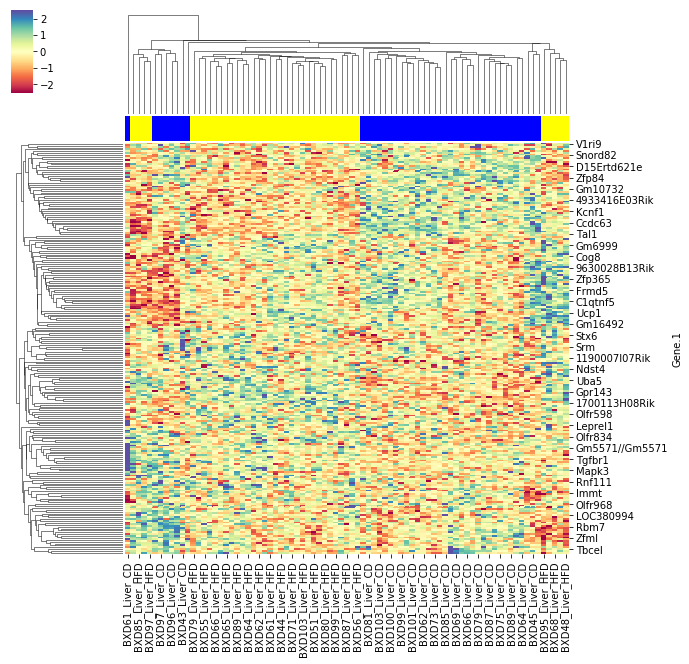

In [196]:
from matplotlib.colors import LogNorm
def convert_to_color(col_names,c_CD, c_HFD):
    out_color = []
    for en in col_names:
        if 'CD' in en:
            out_color.append(c_CD)
        elif 'HFD' in en:
            out_color.append(c_HFD)
        else:
            #out_color.append(c_HFD)
            print('Could not assign color')
        
    return out_color
colors = convert_to_color(dat_norm.columns.tolist(),'blue', 'yellow')
    

#sns.palplot(sns.diverging_palette(150, 275, s=80, l=55, n=9)
#sns.clustermap(dat_norm[::100], vmin = -2.5, vmax = 2.5, norm=LogNorm(vmin=dat_norm.min(), vmax=dat_norm.max()))
sns.clustermap(dat_norm[::100], center = 0, cmap = 'Spectral', col_colors = colors, vmin = -2.5, vmax = 2.5 )

In [197]:
dat_norm.head()


,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,BXD44_Liver_CD,BXD45_Liver_CD,BXD48_Liver_CD,BXD49_Liver_CD,BXD51_Liver_CD,BXD55_Liver_CD,BXD56_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,-1.628467,0.472913,-0.649742,-0.633293,-0.555159,-1.402291,-0.962276,-0.497587,0.049347,-0.542822,...,0.608619,0.300197,1.019848,0.160379,-0.427678,0.867693,1.797071,0.205615,-1.213126,-0.452352
100043387,0.999873,-1.093611,-0.078115,-1.046742,-2.874634,-0.788962,-0.089832,-0.343706,0.000000,-2.804330,...,-0.156230,1.659945,-2.234090,1.968499,1.167820,0.347612,0.046869,1.995840,0.371046,-0.671789
0610007C21Rik,-2.327848,-0.592172,0.306296,0.224617,-1.041406,0.428814,-0.469654,-1.072035,0.347135,-0.898468,...,-0.091889,-0.245037,1.786725,-0.449234,0.745320,0.847418,0.112308,-0.684061,0.439024,0.806579
0610007L01Rik,0.055415,1.317646,1.576249,1.680922,0.283232,1.834852,-1.015942,1.834852,0.455634,0.141616,...,-0.036943,0.320176,2.259701,-1.797909,-1.982626,-1.274545,1.071357,-0.098516,-2.893895,-1.582406
0610007P08Rik,-0.805433,1.265680,0.000000,-0.676834,-0.250429,-0.964489,-0.602383,-2.426452,1.116777,-0.961105,...,0.206435,0.274118,-2.971303,0.098141,0.419637,-1.197997,-1.739465,-0.585462,-0.297807,0.250429


### Subtask 5.3

Now instead of using every 100th row, invent some criteria based on which you can pick the approximately 100-200 "most interesting" differentially expressed genes, and create a heatmap for them.

It would be best to formulate your criteria such that it results in a binary Series with which you can slice your normalized expression DataFrame. You can find out the number of `True` values in a Series by simply summing it.

What does the heatmap of the most interesting genes look like?

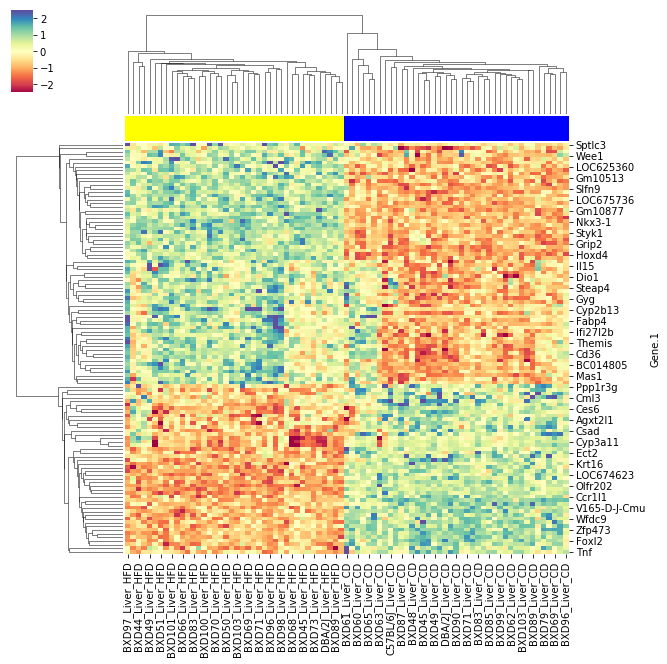

In [205]:
keep = res_df_keep_corr.copy()
colors = convert_to_color(dat_norm.loc[keep.index].columns.tolist(),'blue', 'yellow')
#sns.clustermap(keep, center = 0, cmap = 'Spectral',  vmin = -2.5, vmax = 2.5 )
sns.clustermap(dat_norm.loc[keep.index], center = 0, cmap = 'Spectral', col_colors = colors, vmin = -2.5, vmax = 2.5 )

In [207]:
np.shape(keep)
keep.index


Index(['5330416C01Rik', '5430435G22Rik', '6330409D20Rik', '9030619P08Rik',
       'A930018P22Rik', 'AB056442', 'Acot10//Acot10', 'Agxt2l1', 'Arhgef9',
       'BC014805',
       ...
       'Tmem184a', 'Tmem45b', 'Tnf', 'Tox', 'V165-D-J-Cmu', 'Vmn2r112', 'Wee1',
       'Wfdc9', 'Zfp473', 'Zfp85-rs1'],
      dtype='object', name='Gene.1', length=112)